<a href="https://colab.research.google.com/github/HerikDouglas/analise-precos-materias-primas/blob/main/projeto_analise_materia_prima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Carregando bibliotecas numpy e pandas e apelidando
import numpy as np
import pandas as pd

O comando abaixo carrega o conjunto de dados em um DataFrame utilizando a biblioteca pandas.


In [ ]:
df = pd.read_csv('agricultural_raw_material.csv')

In [ ]:
#visualizar e explorar o DataFrame
df

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
0,Apr-90,482.34,-,236,-,1.83,-,"1,071.63",-,161.20,...,312.36,-,0.84,-,120.66,-,218.76,-,829.29,-
1,May-90,447.26,-7.27%,234,-0.85%,1.89,3.28%,"1,057.18",-1.35%,172.86,...,350.12,12.09%,0.85,1.19%,124.28,3.00%,213.00,-2.63%,842.51,1.59%
2,Jun-90,440.99,-1.40%,216,-7.69%,1.99,5.29%,898.24,-15.03%,181.67,...,373.94,6.80%,0.85,0.00%,129.45,4.16%,200.00,-6.10%,831.35,-1.32%
3,Jul-90,418.44,-5.11%,205,-5.09%,2.01,1.01%,895.83,-0.27%,187.96,...,378.48,1.21%,0.86,1.18%,124.23,-4.03%,210.05,5.03%,798.83,-3.91%
4,Aug-90,418.44,0.00%,198,-3.41%,1.79,-10.95%,951.22,6.18%,186.13,...,364.60,-3.67%,0.88,2.33%,129.70,4.40%,208.30,-0.83%,818.74,2.49%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,Dec-19,NaN,NaN,NaN,NaN,1.67,1.21%,NaN,NaN,272.80,...,500.37,-0.22%,1.66,7.79%,NaN,NaN,NaN,NaN,875.00,0.00%
357,Jan-20,NaN,NaN,NaN,NaN,1.74,4.19%,NaN,NaN,272.40,...,499.64,-0.15%,1.68,1.20%,NaN,NaN,NaN,NaN,875.00,0.00%
358,Feb-20,NaN,NaN,NaN,NaN,1.69,-2.87%,NaN,NaN,270.56,...,496.28,-0.67%,1.61,-4.17%,NaN,NaN,NaN,NaN,875.00,0.00%
359,Mar-20,NaN,NaN,NaN,NaN,1.49,-11.83%,NaN,NaN,276.93,...,507.96,2.35%,1.50,-6.83%,NaN,NaN,NaN,NaN,875.00,0.00%


In [ ]:
#verifica se há presença de registros nulos
df.isnull().sum()

Month                            0
Coarse wool Price               34
Coarse wool price % Change      34
Copra Price                     22
Copra price % Change            22
Cotton Price                     0
Cotton price % Change            0
Fine wool Price                 34
Fine wool price % Change        34
Hard log Price                   0
Hard log price % Change          0
Hard sawnwood Price             34
Hard sawnwood price % Change    34
Hide Price                      34
Hide price % change             34
Plywood Price                    0
Plywood price % Change           0
Rubber Price                     0
Rubber price % Change            0
Softlog Price                   34
Softlog price % Change          34
Soft sawnwood Price             34
Soft sawnwood price % Change    34
Wood pulp Price                  1
Wood pulp price % Change         1
dtype: int64

É possível Observar a mesma quantidade de registros nulos em alguns casos devido a relação entre as informações de preço e variação, ou seja se não há informação de preço também não há informação de variação.


In [ ]:
#TRATANDO OS DADOS AUSENTES, INCORRETOS E INVÁLIDOS

#Substituindo os caracteres "%", "," e "-"

df = df.replace('%', '', regex=True)
df = df.replace(',', '', regex=True)
df = df.replace('-', '', regex=True)
df = df.replace('', np.nan)
df = df.replace('MAY90', np.nan)

#Eliminando linhas com valores Não Números
df = df.dropna()

#Verificando se todos os valores Não números foram removidos
df.isnull().sum()

#Convertendo dados para o tipo float
lst = ["Coarse wool Price", "Coarse wool price % Change", "Copra Price", "Copra price % Change", "Cotton price % Change","Fine wool Price", "Fine wool price % Change", "Hard log price % Change", "Hard sawnwood price % Change", "Hide price % change", "Plywood price % Change", "Rubber price % Change", "Softlog price % Change", "Soft sawnwood price % Change", "Wood pulp price % Change"]
df[lst] = df[lst].astype("float")
df.dtypes

Month                            object
Coarse wool Price               float64
Coarse wool price % Change      float64
Copra Price                     float64
Copra price % Change            float64
Cotton Price                    float64
Cotton price % Change           float64
Fine wool Price                 float64
Fine wool price % Change        float64
Hard log Price                  float64
Hard log price % Change         float64
Hard sawnwood Price             float64
Hard sawnwood price % Change    float64
Hide Price                      float64
Hide price % change             float64
Plywood Price                   float64
Plywood price % Change          float64
Rubber Price                    float64
Rubber price % Change           float64
Softlog Price                   float64
Softlog price % Change          float64
Soft sawnwood Price             float64
Soft sawnwood price % Change    float64
Wood pulp Price                 float64
Wood pulp price % Change        float64


A necessidade do tratamento dos dados fazendo as devidas substituições e transformando para o tipo float se dá por conta da realização dos cálculos a serem feitos, que só podem ser executados com dados númericos.

In [ ]:
#Mostrar as primeiras cinco linhas
df.head()

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
1,May90,447.26,7.27,234.0,0.85,1.89,3.28,1057.18,1.35,172.86,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
2,Jun90,440.99,1.40,216.0,7.69,1.99,5.29,898.24,15.03,181.67,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
3,Jul90,418.44,5.11,205.0,5.09,2.01,1.01,895.83,0.27,187.96,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
4,Aug90,418.44,0.00,198.0,3.41,1.79,10.95,951.22,6.18,186.13,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
5,Sep90,412.18,1.50,196.0,1.01,1.79,0.00,936.77,1.52,185.33,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87


In [ ]:
#COLUNA DE DATA
#formatando a coluna de data como índice para o conjuto de dados

df.Month = pd.to_datetime(df.Month.str.upper(), format='%b%y', yearfirst=False)
df = df.set_index('Month')


In [ ]:
df.head()

,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Month,,,,,,,,,,,,,,,,,,,,,
1990-05-01,447.26,7.27,234.0,0.85,1.89,3.28,1057.18,1.35,172.86,7.23,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
1990-06-01,440.99,1.40,216.0,7.69,1.99,5.29,898.24,15.03,181.67,5.10,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
1990-07-01,418.44,5.11,205.0,5.09,2.01,1.01,895.83,0.27,187.96,3.46,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
1990-08-01,418.44,0.00,198.0,3.41,1.79,10.95,951.22,6.18,186.13,0.97,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
1990-09-01,412.18,1.50,196.0,1.01,1.79,0.00,936.77,1.52,185.33,0.43,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87


ÁNALISE EXPLORATÓRIA

Ápos o devido tratamento dos dados é possível então iniciar de fato o processo de análise exploratória e de visualização.

O código abaixo inicia importando duas bibliotecas de super importância nesse processo e também define um padrão para os gráficos de visualização.

In [ ]:
#Importando as bibliotecas matplotlib.pyplot e seaborn

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

#Definindo padrão para os gráficos
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


**MAPA DE CALOR**

O código abaixo é de um primeiro gráfico que usa uma função estátistica de correlação para relacionar somente os preços das matérias primas.

<function matplotlib.pyplot.show(close=None, block=None)>

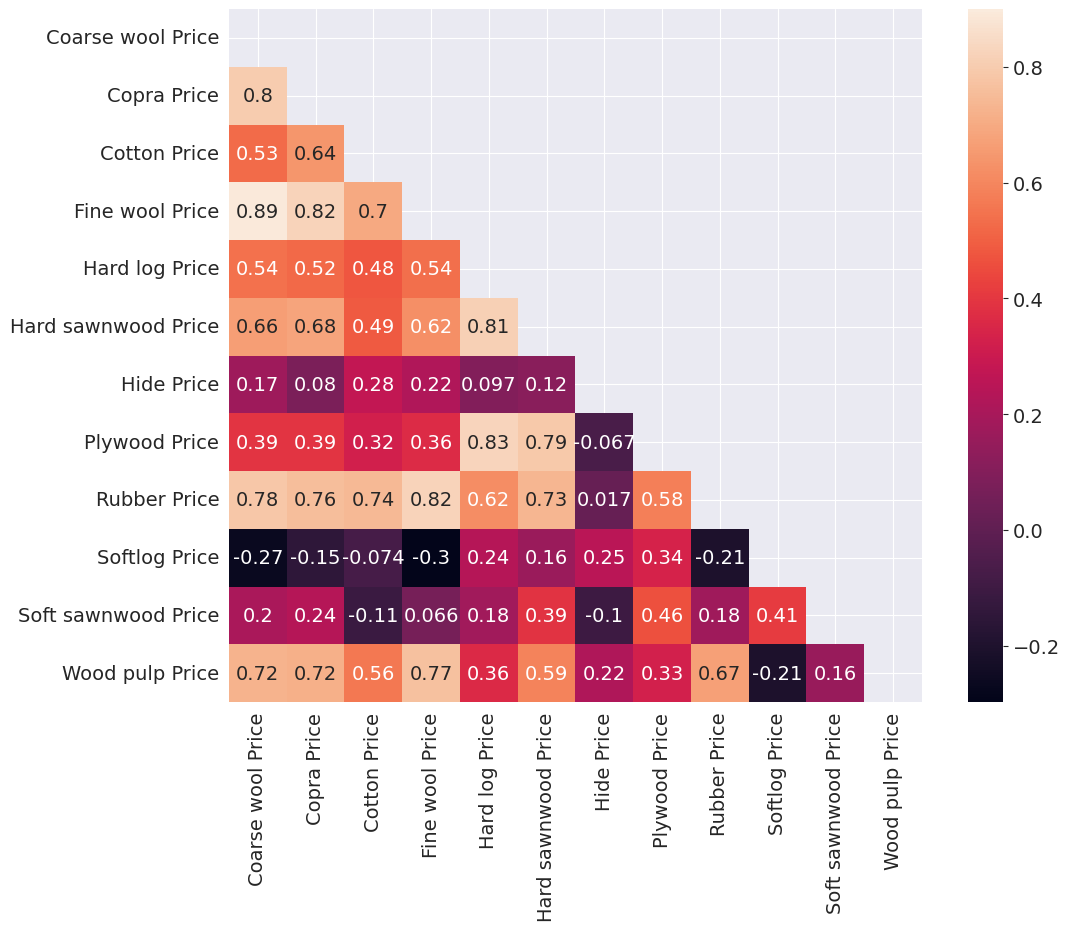

In [ ]:
#Lista dos preços das matérias-primas
lista_materias=['Coarse wool Price',  'Copra Price','Cotton Price', 'Fine wool Price',  'Hard log Price', 'Hard sawnwood Price',
 'Hide Price', 'Plywood Price', 'Rubber Price', 'Softlog Price', 'Soft sawnwood Price', 'Wood pulp Price']

#Obtendo matriz de correlação
corrmat = df[lista_materias].corr()

#Definindo o tamanho do gráfico
fig = plt.figure(figsize = (12, 9))

#mascarando a parte superior do trem, pois a matriz é simétrica (repetitiva)
mask = np.triu(np.ones_like(corrmat, dtype=bool))
sns.heatmap(corrmat, vmax = 0.9, mask=mask, square = True, annot = True)
plt.show

No mapa de calor podemos observar a correlação entre os preços das materias primas. Quanto maior o valor de correlação maior a chance de serem duas materias primas corelacionadas, mas não necessariamente.

Para apronfundar mais no aspecto de correlação de materias temos abaixo um gráfico agora correlacionando a taxa de variação das matérias ao ínves dos preços.

<function matplotlib.pyplot.show(close=None, block=None)>

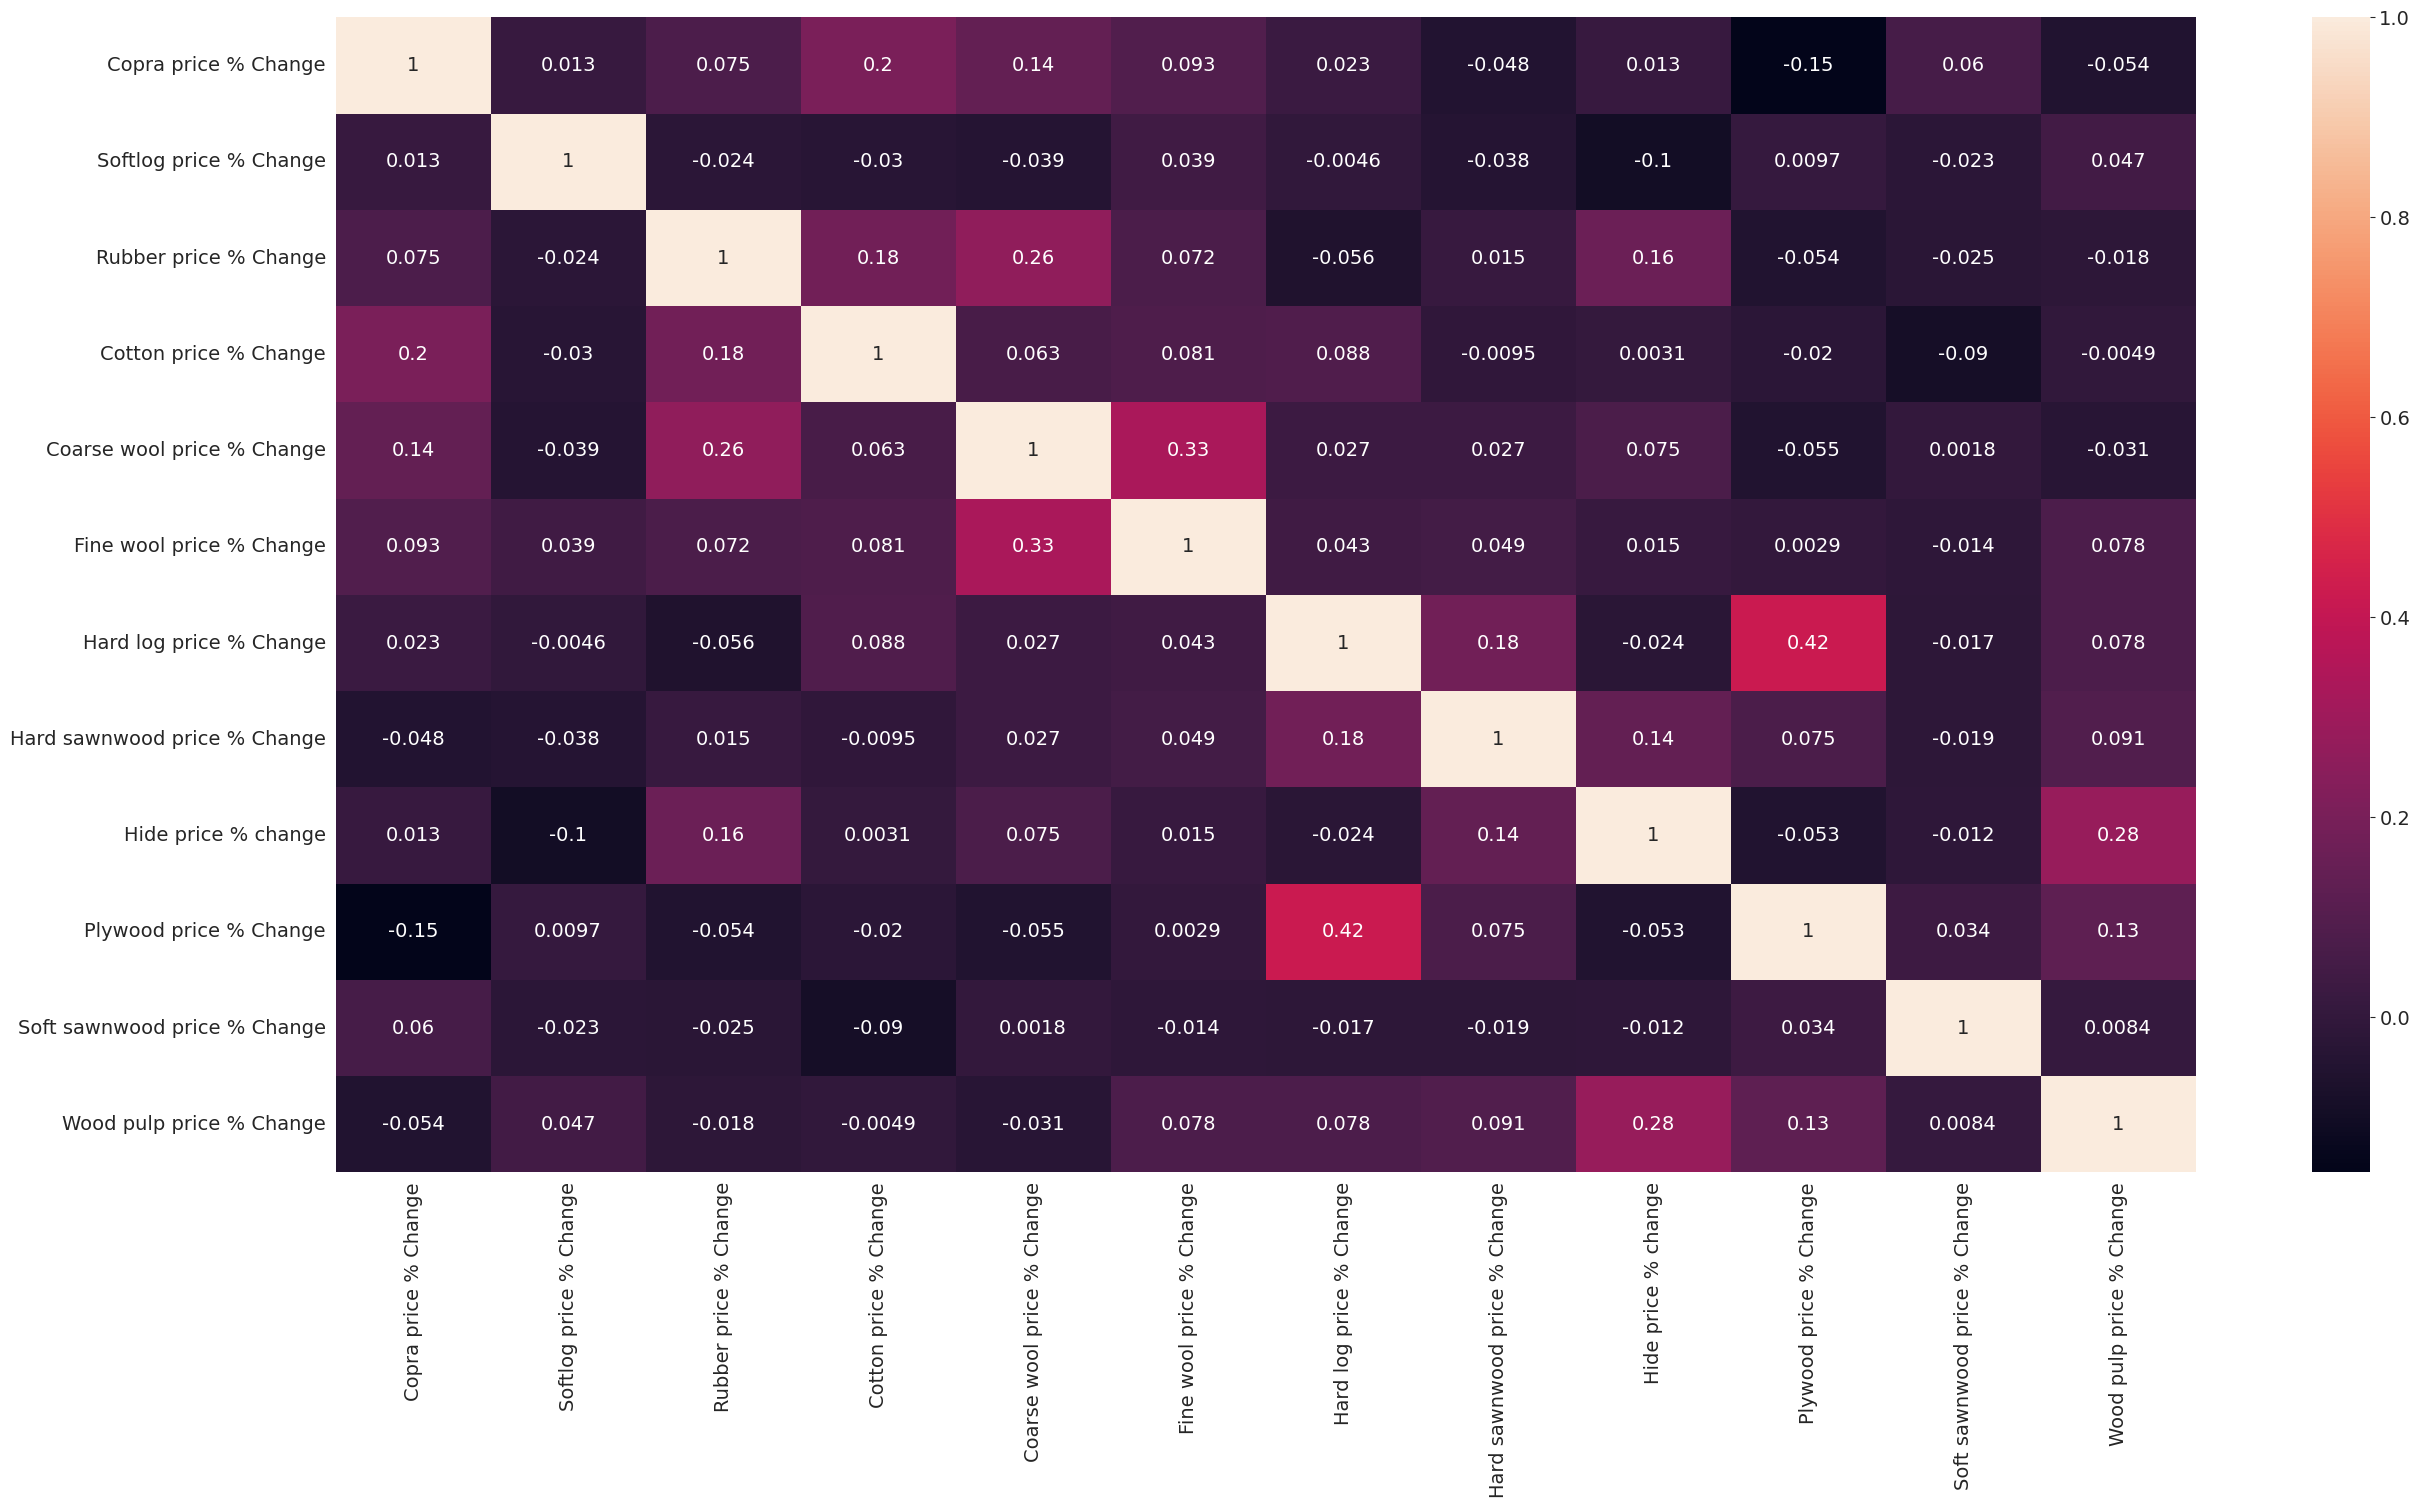

In [ ]:
#Define o tamanho do gráfico e cria uma lista com o nome das colunas que contém as porcentgens de variação de preços
plt.figure(figsize=(30, 15))
lista_variacao = ['Copra price % Change','Softlog price % Change','Rubber price % Change','Cotton price % Change','Coarse wool price % Change','Fine wool price % Change','Hard log price % Change','Hard sawnwood price % Change','Hide price % change','Plywood price % Change','Soft sawnwood price % Change','Wood pulp price % Change']

#Cria uma linha de correlação para o conjunto de dados, ou seja para as variações
matriz_cor = df[lista_variacao].corr()

#Cria o mapa de calor
sns.heatmap(matriz_cor, annot=True)
plt.show


No mapa de calor acima não é possível observar muitas matérias com indicadores de correlação grandes o suficientes a serem considerados, somente quatro matérias aparecem com indicador de destaque, que mesmo assim não será considerado visto que uma correlação forte é acima de 0.7 e nesse caso os indicadores apresentam as duas maiores correlações com 0.42.

Portanto:


*  Quase não há correlação entre a varição percentual de preços das materias primas
* A variação no preço, vista no mapa de calor anterior é real, ou seja se uma sobe de preço outra também irá subir, todavia, como não há correlação na variação percentual, se uma cair 20%, por exemplo, não afetará necessariamente outra matéria.

**VERIFICANDO A VARIAÇÃO DE PREÇO E VARIAÇÃO PERCENTUAL DA 'Coarse wool (Lã Grossa)'**

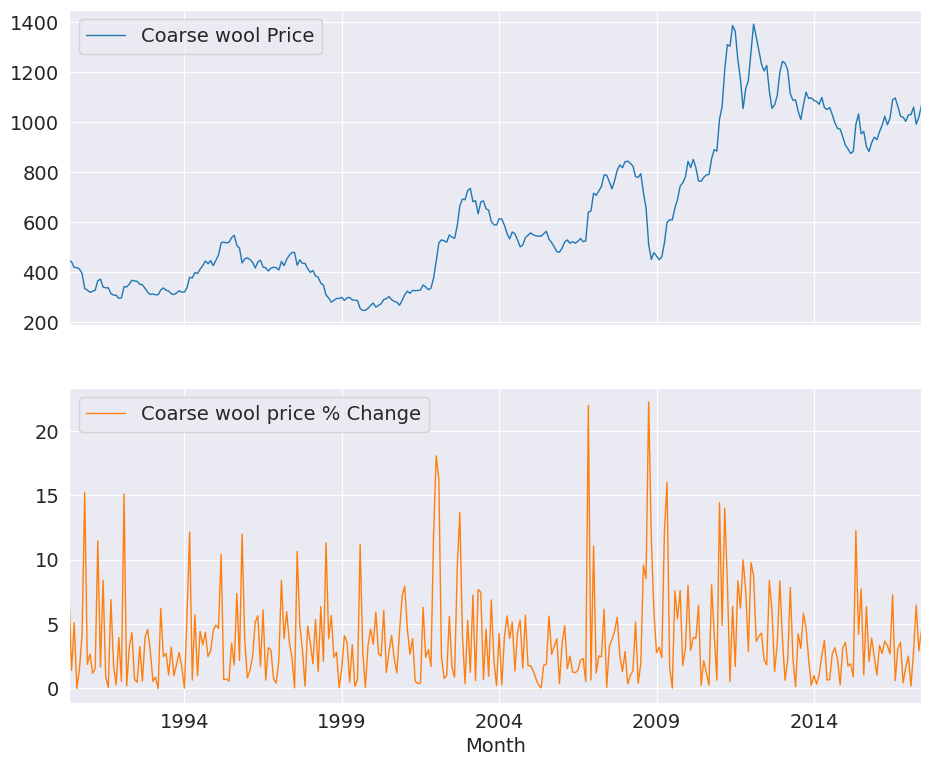

In [ ]:
#Cria dois gráficos separados com as informações das colunas de preço e taxa de variaçã percentual da Lã Grossa
axes=df[['Coarse wool Price', 'Coarse wool price % Change']].plot(figsize=(11, 9), subplots=True, linewidth=1)

Nestes gráficos observamos a evolução do preço e a variação percentual especificamente da Lã Grossa. Podemos explicar o aumento do preço no acumulado ao longo do tempo devido ao grande percentual dos aumentos, sempre maior do que as quedas.

**ANALISE EXPLÓRATORIA**

*Fazendo e Respondendo Perguntas a Partir dos dados*

****
**QUESTÃO 01 - Qual a variação normal do preço de cada materia prima?**




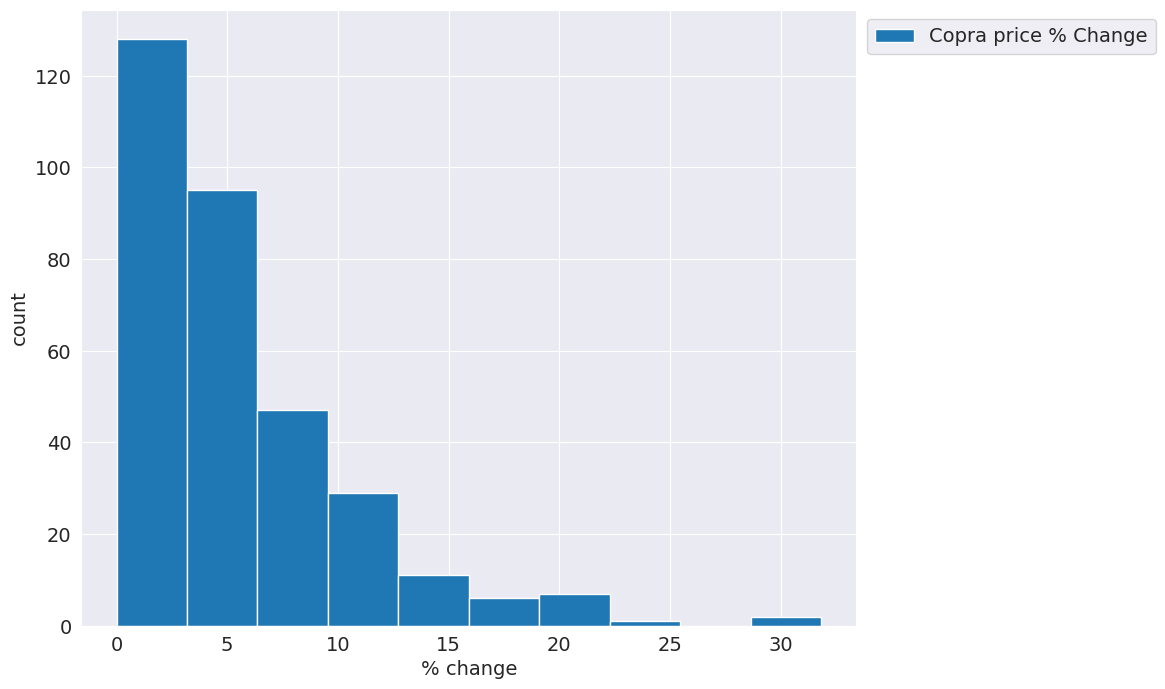

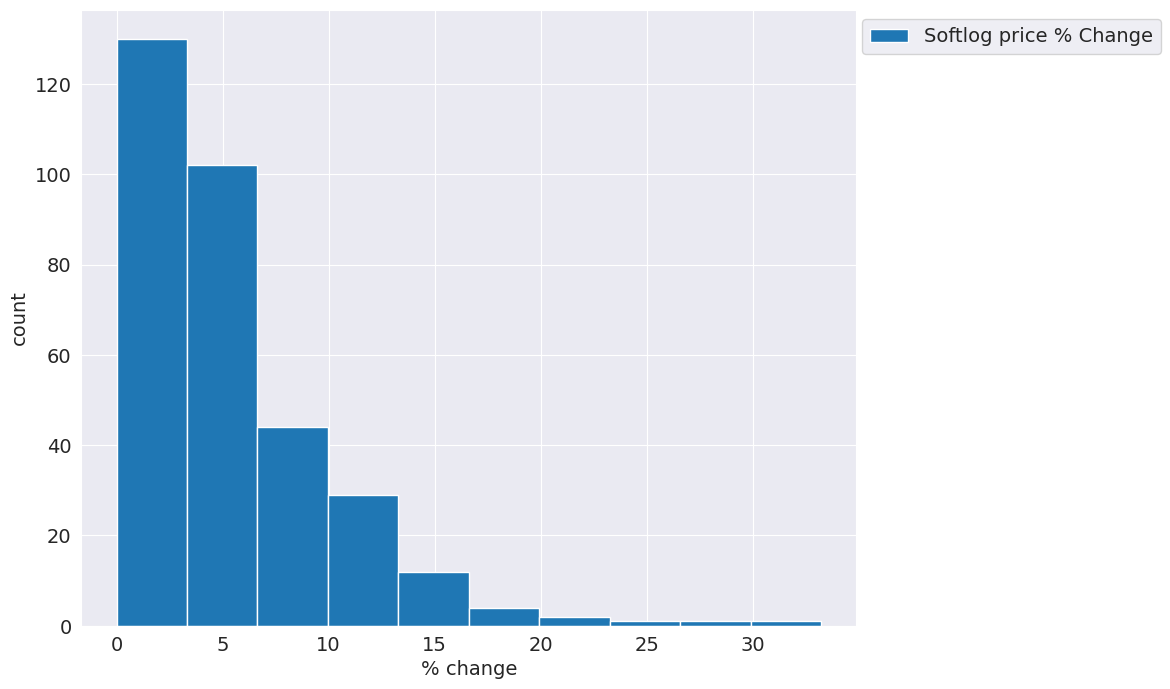

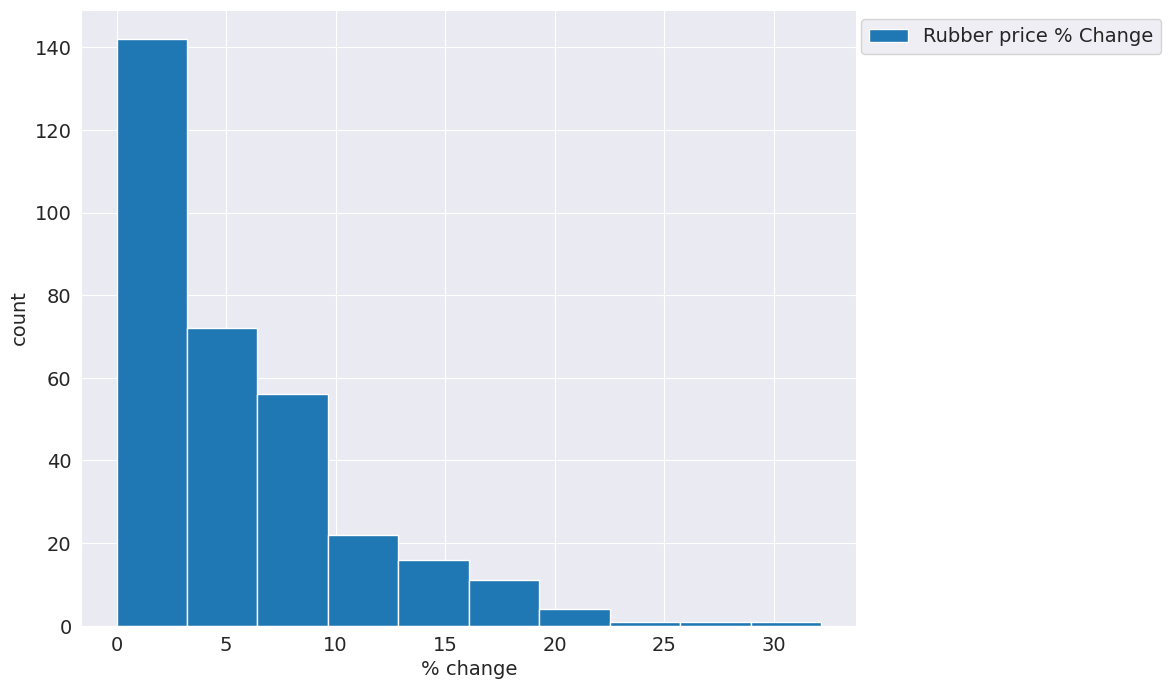

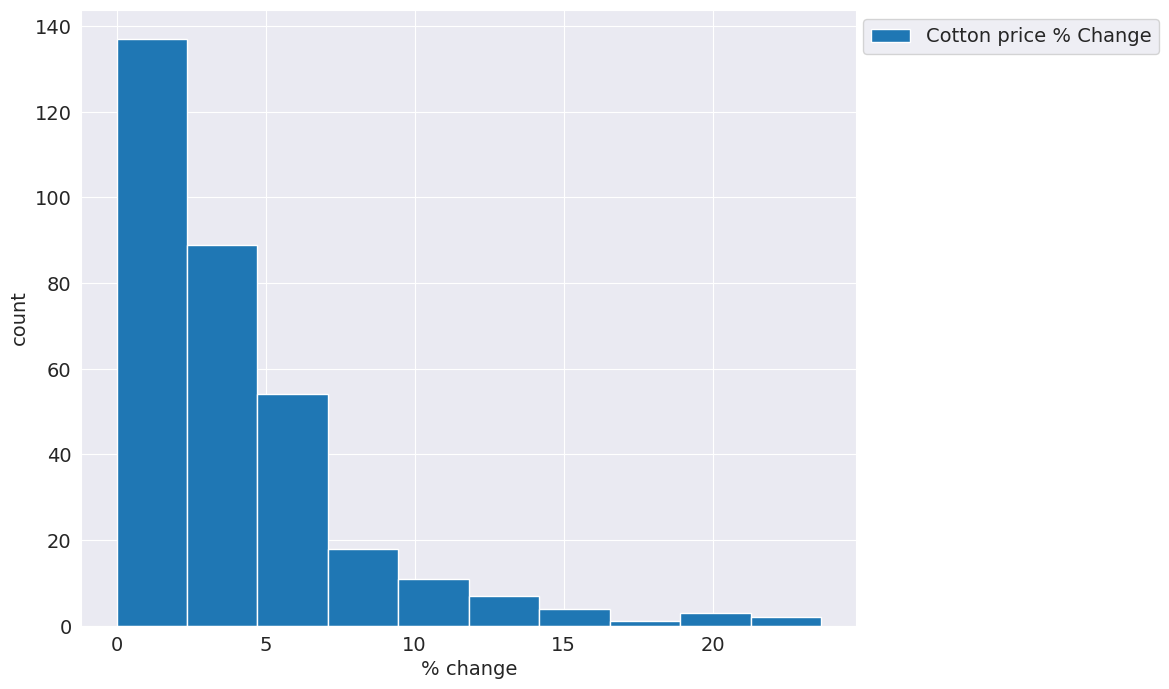

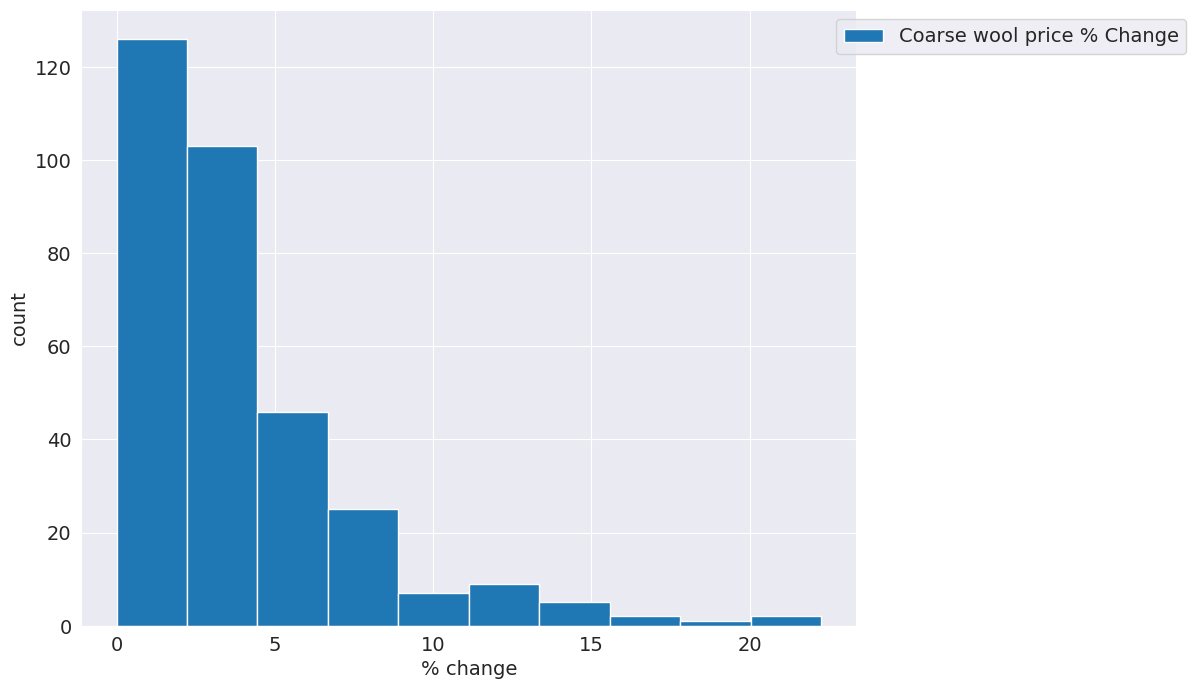

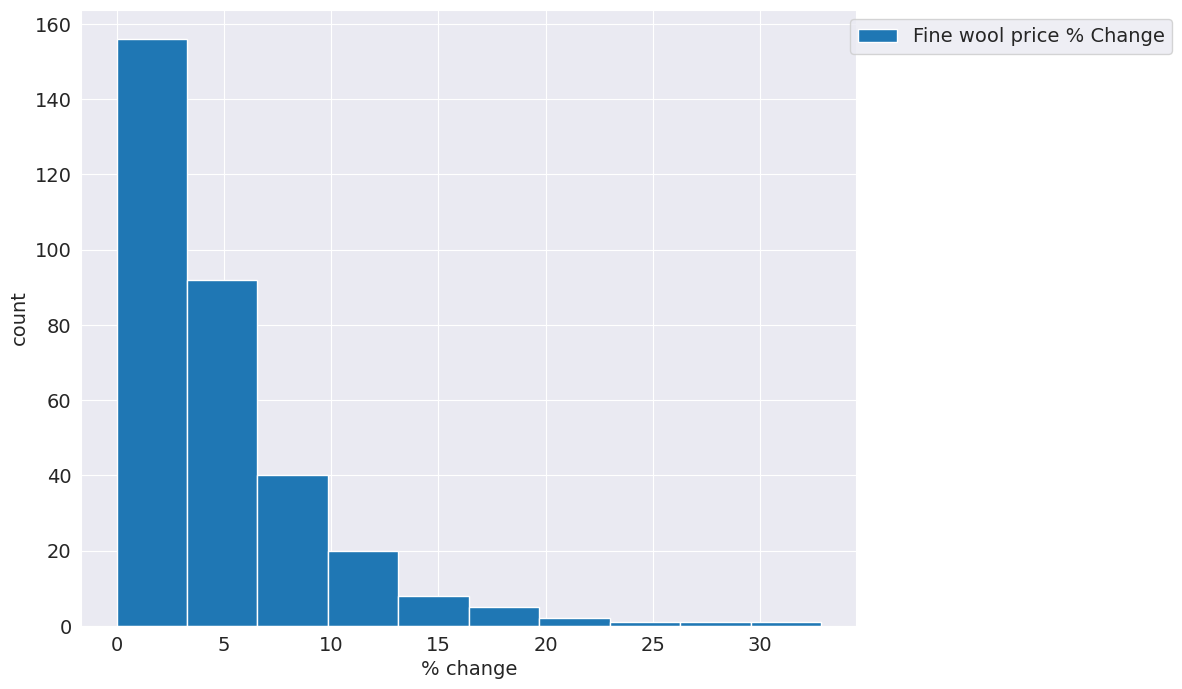

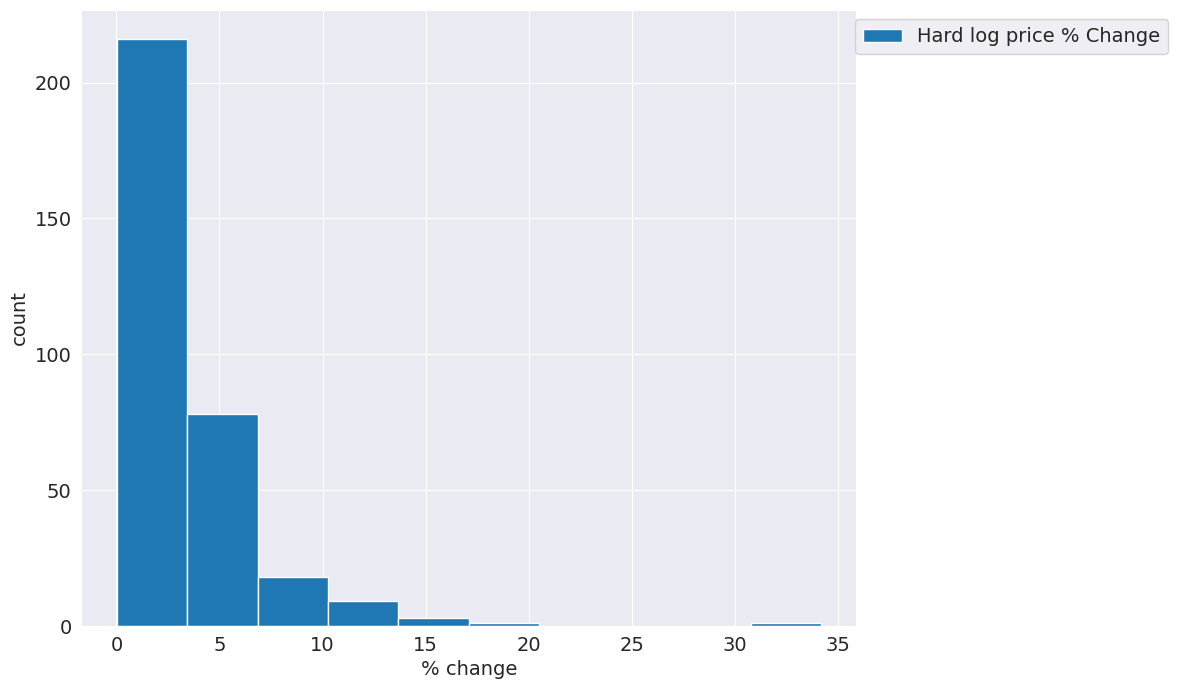

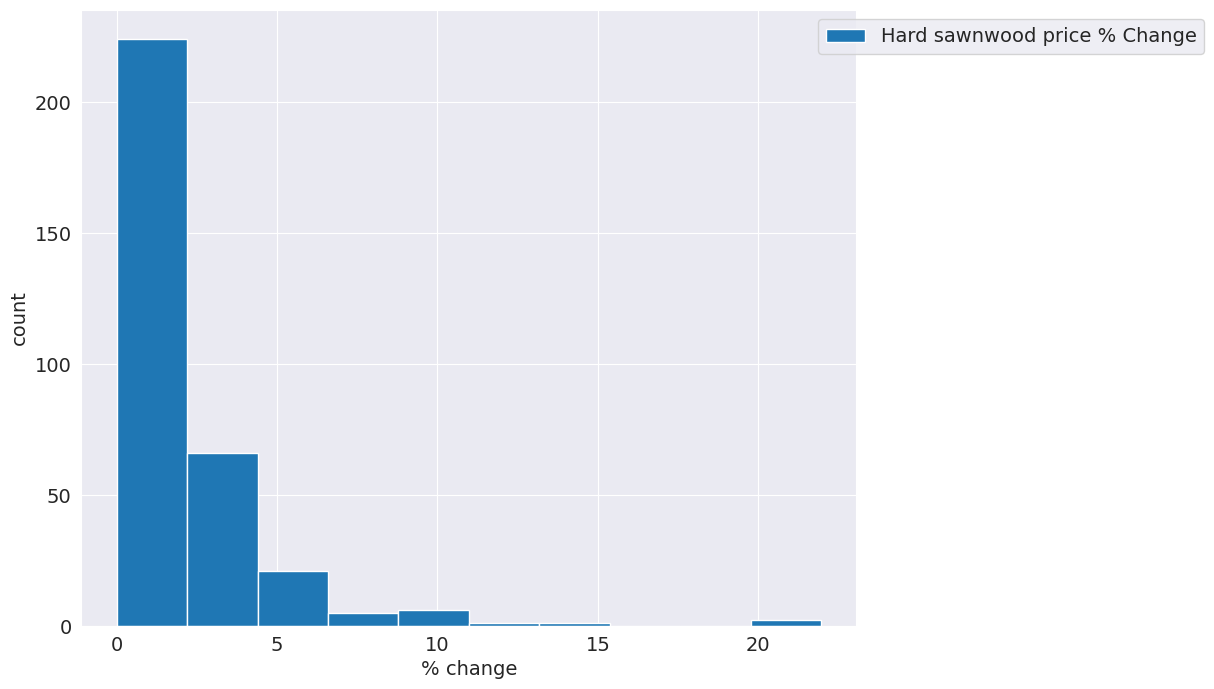

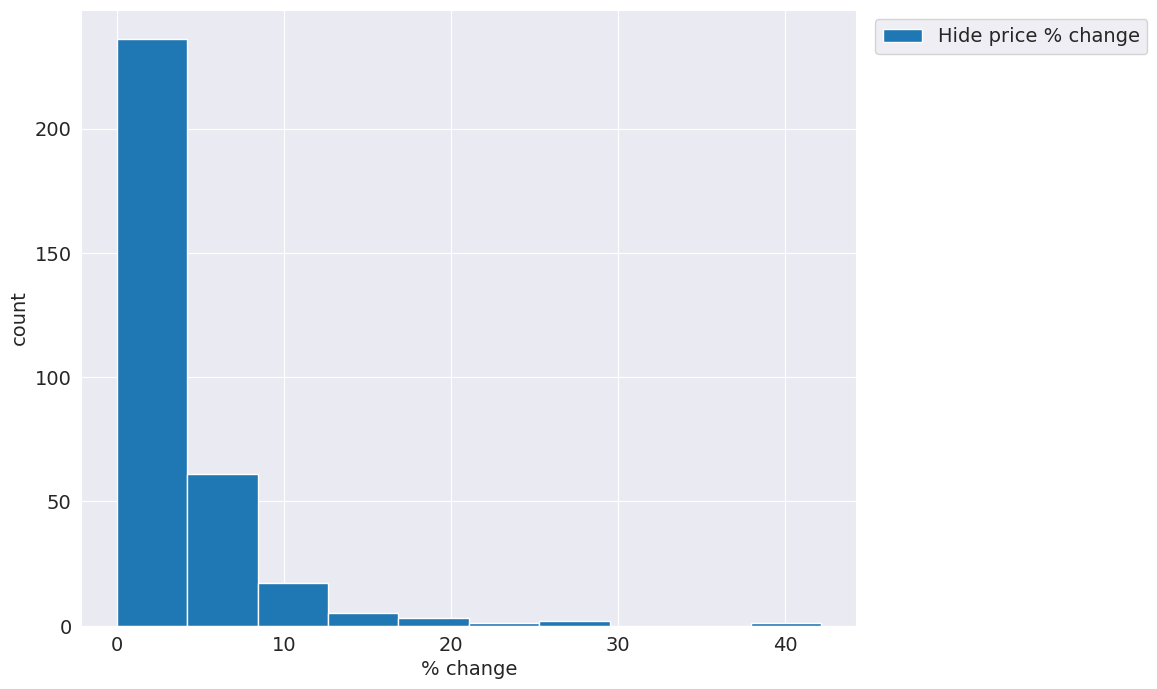

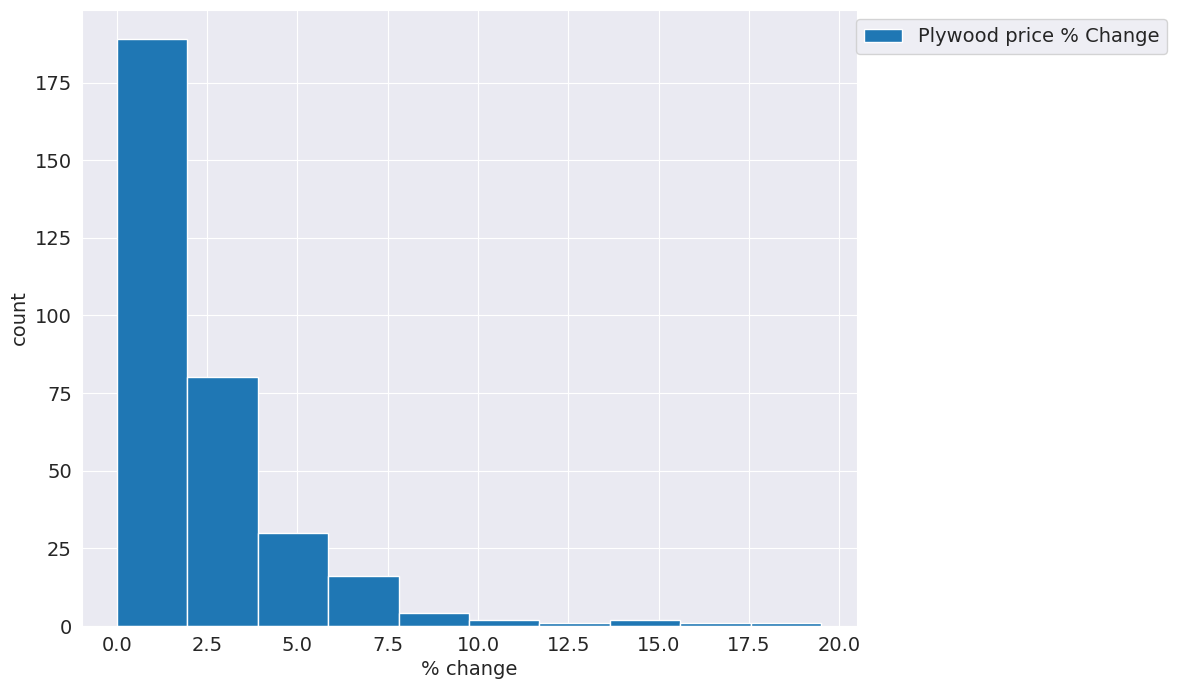

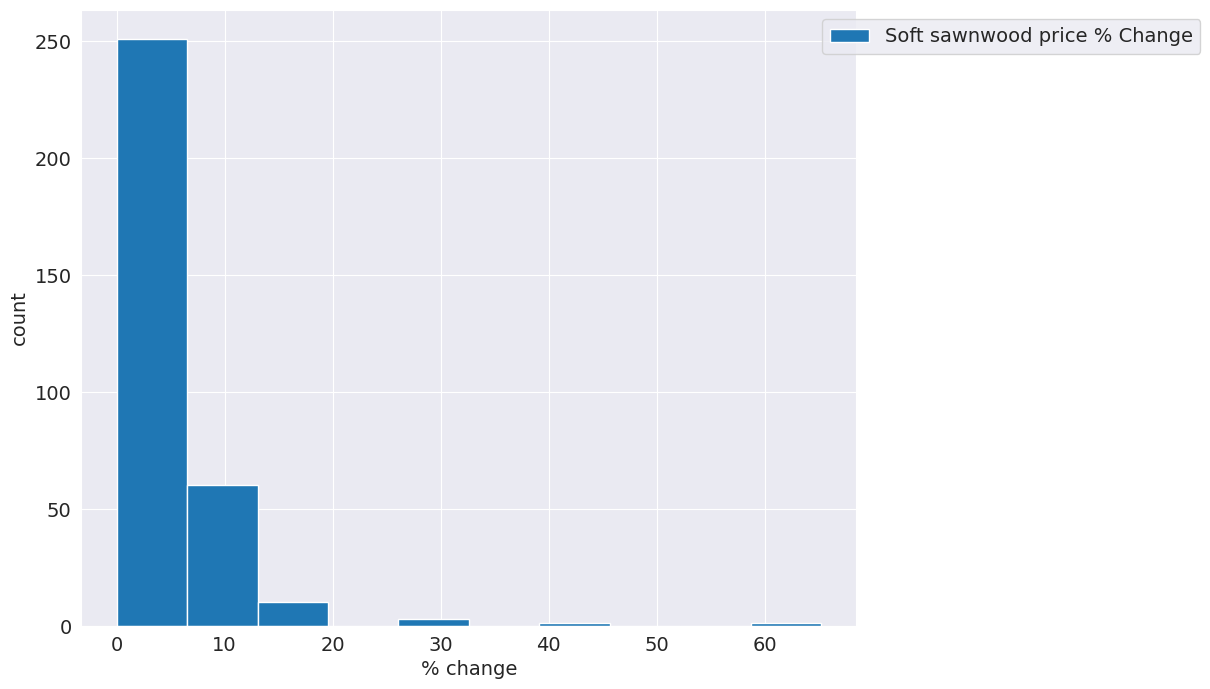

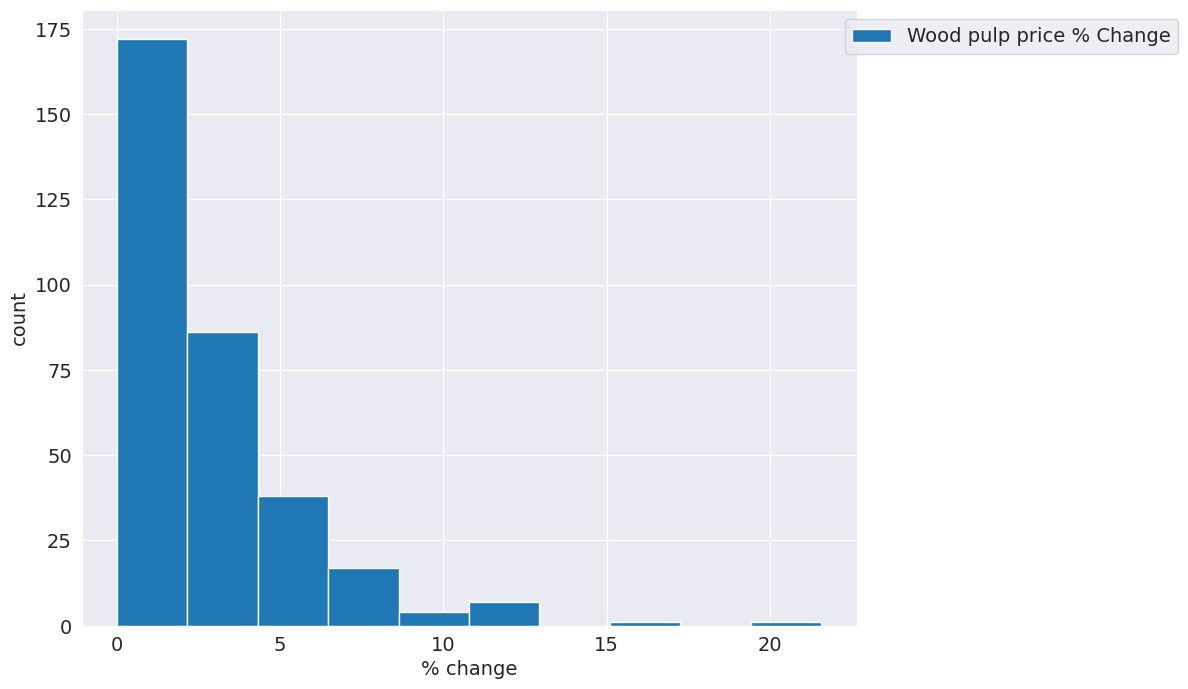

In [ ]:
#Cria um gráfico para cada matéria prima exibindo a porcentagem e a quantidade de ocorrências em determinada porcentagem de variação
for i in range(len(lista_variacao)):
  plt.figure(figsize=(10, 10))
  df[lista_variacao[i]].hist(figsize=(10, 8), linewidth=1)
  plt.xlabel('% change')
  plt.ylabel('count')
  plt.legend(lista_variacao[i:], loc='upper center', bbox_to_anchor=(1.2,1))


* Podemos observar que a grande maioria das metérias sofreu maior quantidade de variação em até 5%.

* Também temos matérias que tiveram um índice de taxa de variação ainda menor, como a madeira serrada dura(Hard sawnwood), com a grande parte de variações entre 0 e 5%.  essa informação pensada sob a ótica de investimentos favorece a escolha dessas matérias com variação de baixo índice de volatilidade.

**QUESTÃO 02 - Encontre a metéria-prima que tem o menor preço ao longo dos anos**

Text(0.5, 0.98, 'Comparação de preços de matérias-primas')

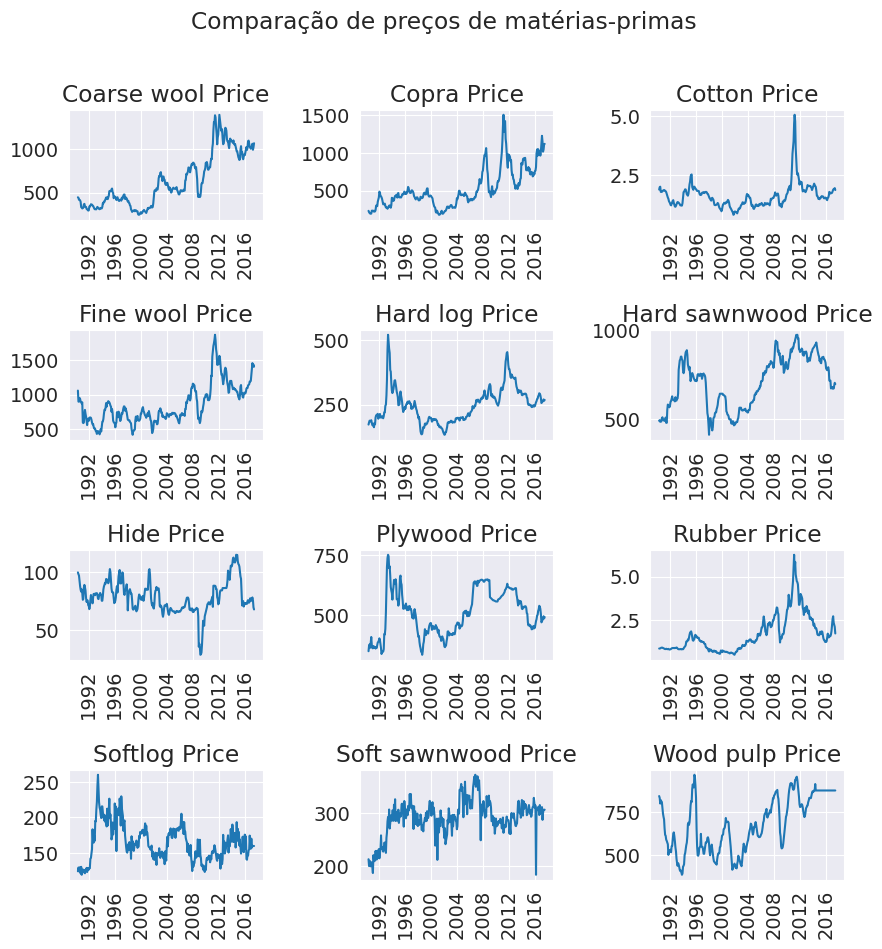

In [ ]:
#Cria um gráfico para cada matéria prima exibindo a variação de preço ao longo do anos
plt.figure(figsize=(10, 10))
lista_materias
for i in range(len(lista_materias)):
  plt.subplot(4,3,i+1)
  plt.subplots_adjust(hspace=1, wspace=0.5)
  plt.title(lista_materias[i])
  plt.plot(df[lista_materias[i]])
  plt.xticks(rotation=90)
plt.suptitle('Comparação de preços de matérias-primas')

Vemos que algodão e borracha são as duas matérias primas de preço mais baixo, todavia ambas são apresentadas com mesmo índice, portando ainda não podemos dizer qual das duas é exatamente a de preço mais baixo. Comparar o preço das duas especificamente é o melhor para identificar agora, segue o código abaixo.

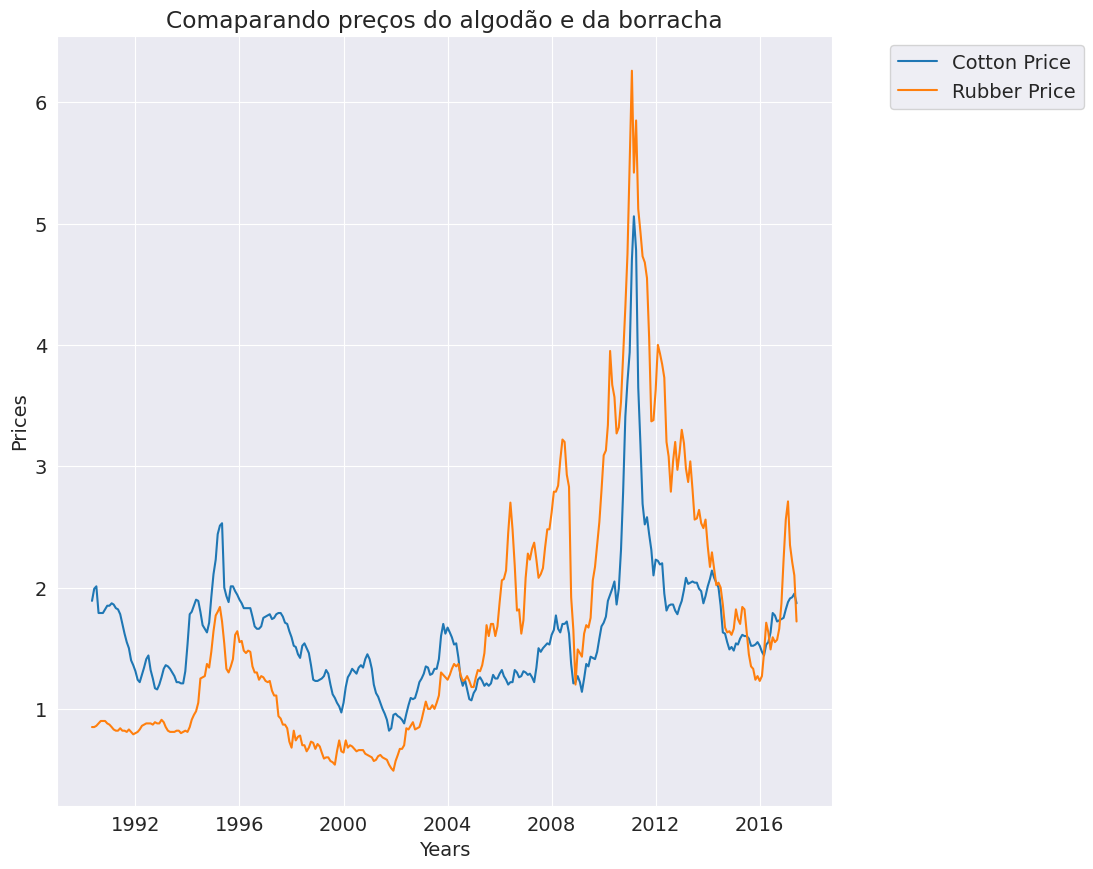

In [ ]:
#Gráfico para comparar a variação de preço de duas matérias-primas
plt.figure(figsize=(10, 10))
plt.plot(df[['Cotton Price','Rubber Price']])
plt.title('Comaparando preços do algodão e da borracha')
plt.xlabel('Years')
plt.ylabel('Prices')
plt.legend(['Cotton Price','Rubber Price'], loc='upper center', bbox_to_anchor=(1.2,1))

O algodão e a borracha são as duas matérias-primas de menor preço ao longo do tempo, porém o algodão é a matéria de menor preço.

**QUESTÃO 03 -  Qual matéria-prima tem a maior e menor variação de % de preço**

In [ ]:
#Importando biblioteca random
import random as random

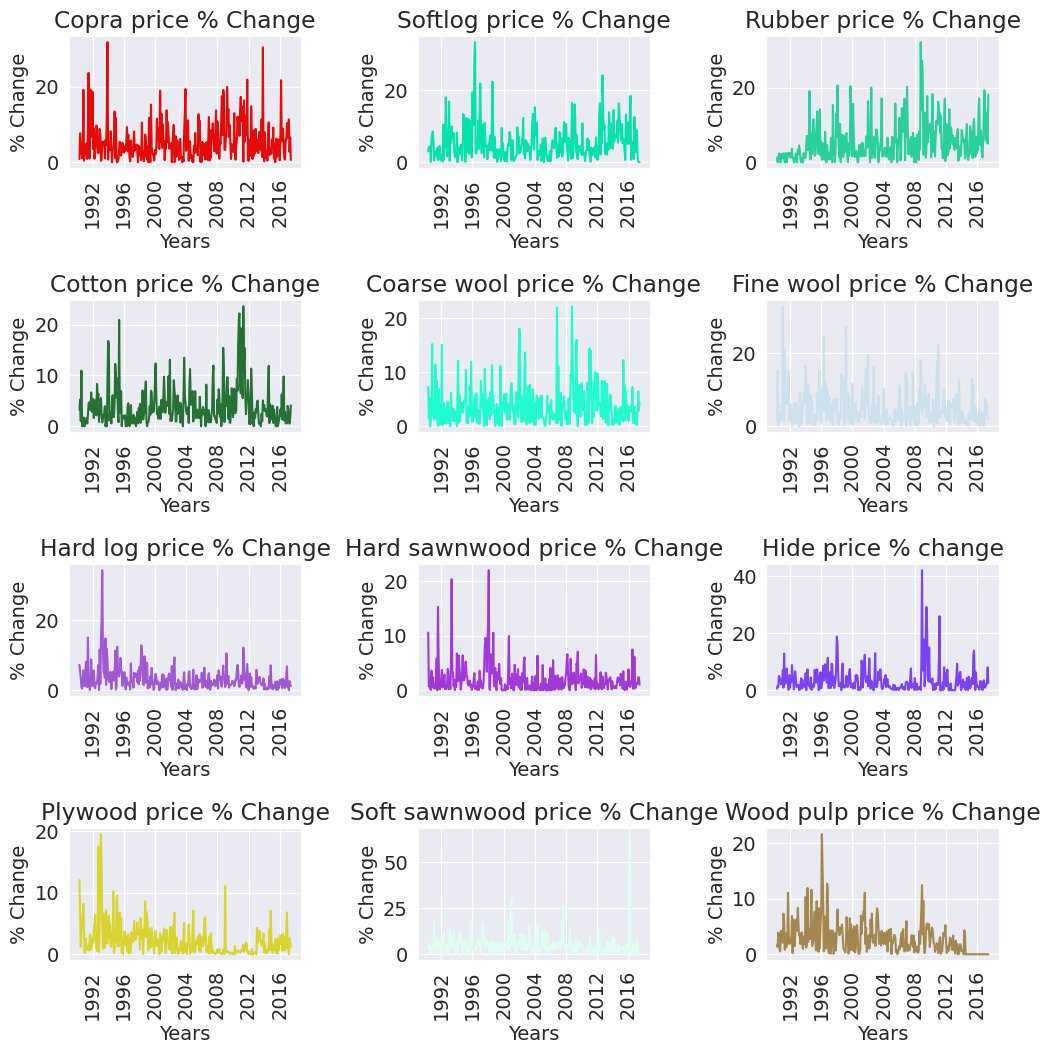

In [ ]:
#Gráfico para verificar a variação percentual de cada matéria-prima
plt.figure(figsize=(12, 12))
for i in range(len(lista_variacao)):

  r = random.random()
  b = random.random()
  g = random.random()

  color = (r, g, b,)
  plt.subplot(4,3,i+1)
  plt.subplots_adjust(hspace = 1, wspace = 0.5)
  plt.plot(df[lista_variacao[i]], c = color)
  plt.xticks(rotation=90)
  plt.title(lista_variacao[i])
  plt.xlabel('Years')
  plt.ylabel('% Change')


A madeira serrada macia (Soft sawnwood ) apresenta variação % acima de 60, e portanto tem a maior variação. A menor fica com a madeira compensada (Plywood) com % em menos de 20.

**QUESTÃO 04 - Encontre as matérias-primas com mudança drástica de preço**

Para chegar a resposta desta pergunda vamos criar dois gráficos de dispersão, um com os preços baixos e outro com os preços altos, assim podermos ver a metéria prima que teve mudança drástica tanto nas de baixo preço como nas de alto preço. Obtemos esses dois grupos a partir do gráfico que compara o preço das matérias primas. Consideramos baixo preço até 500 doláres e alto acima de 500 doláres.

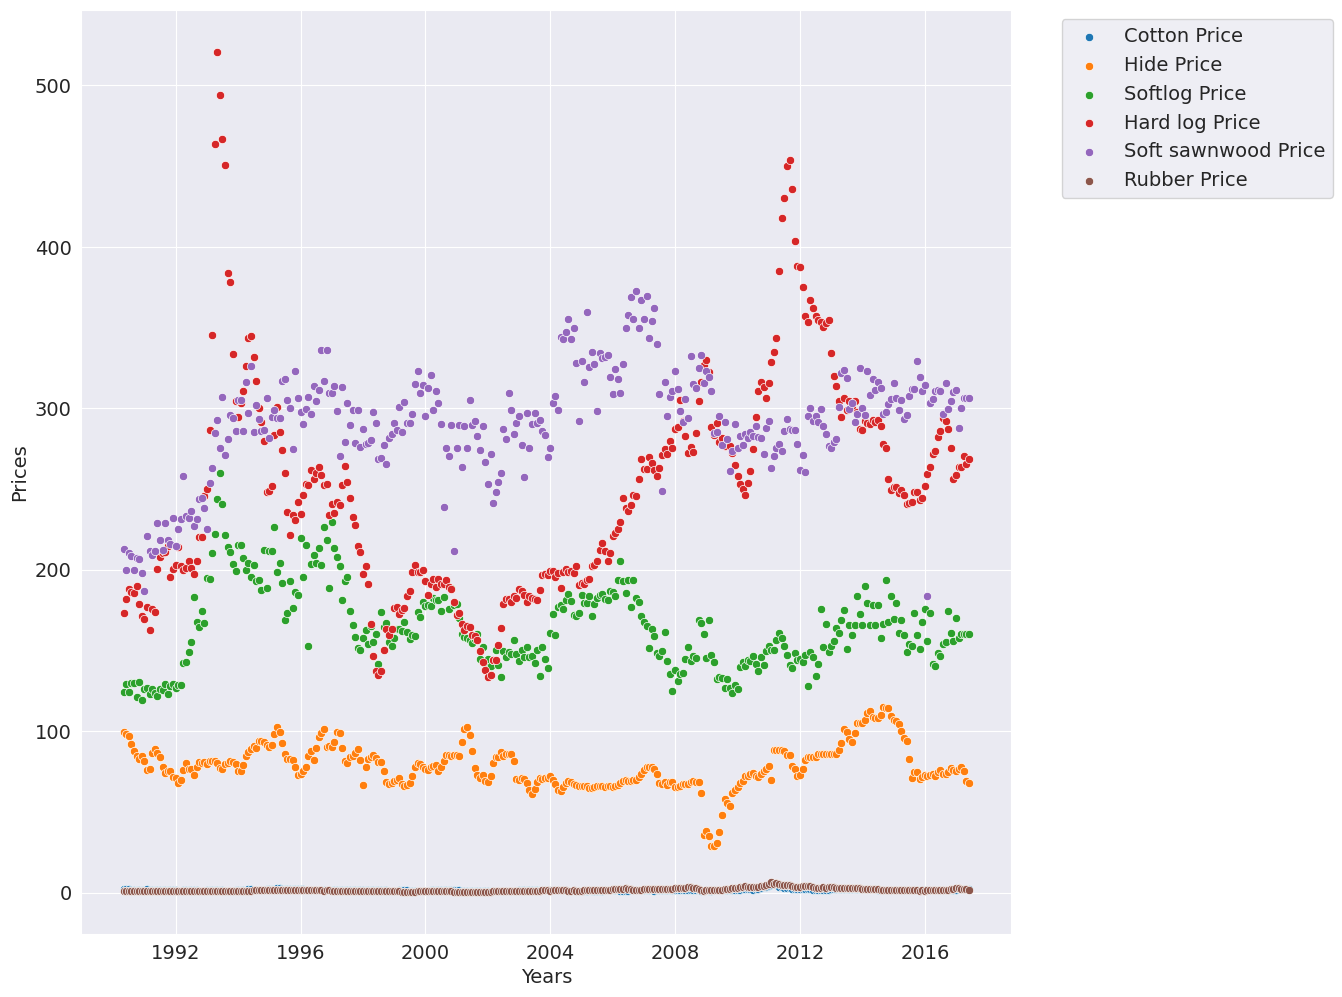

In [ ]:
#Gráfico de dispersão para a visualização das matérias-primas de baixo preço
#Cria uma lista com as metérias-primas de baixo preço
lista_baixo_preco = ['Cotton Price','Hide Price','Softlog Price','Hard log Price','Soft sawnwood Price','Rubber Price']
#Define o tamanaho do gráfico e os eixos
plt.figure(figsize=(12, 12))
plt.ylabel('Prices')
plt.xlabel('Years')

#loop para iterar cada elemento na lista e exibir
for i in range(len(lista_baixo_preco)):
  sns.scatterplot(y=df[lista_baixo_preco[i]], x=df.index);
  plt.legend(lista_baixo_preco, loc='upper center', bbox_to_anchor=(1.2,1))


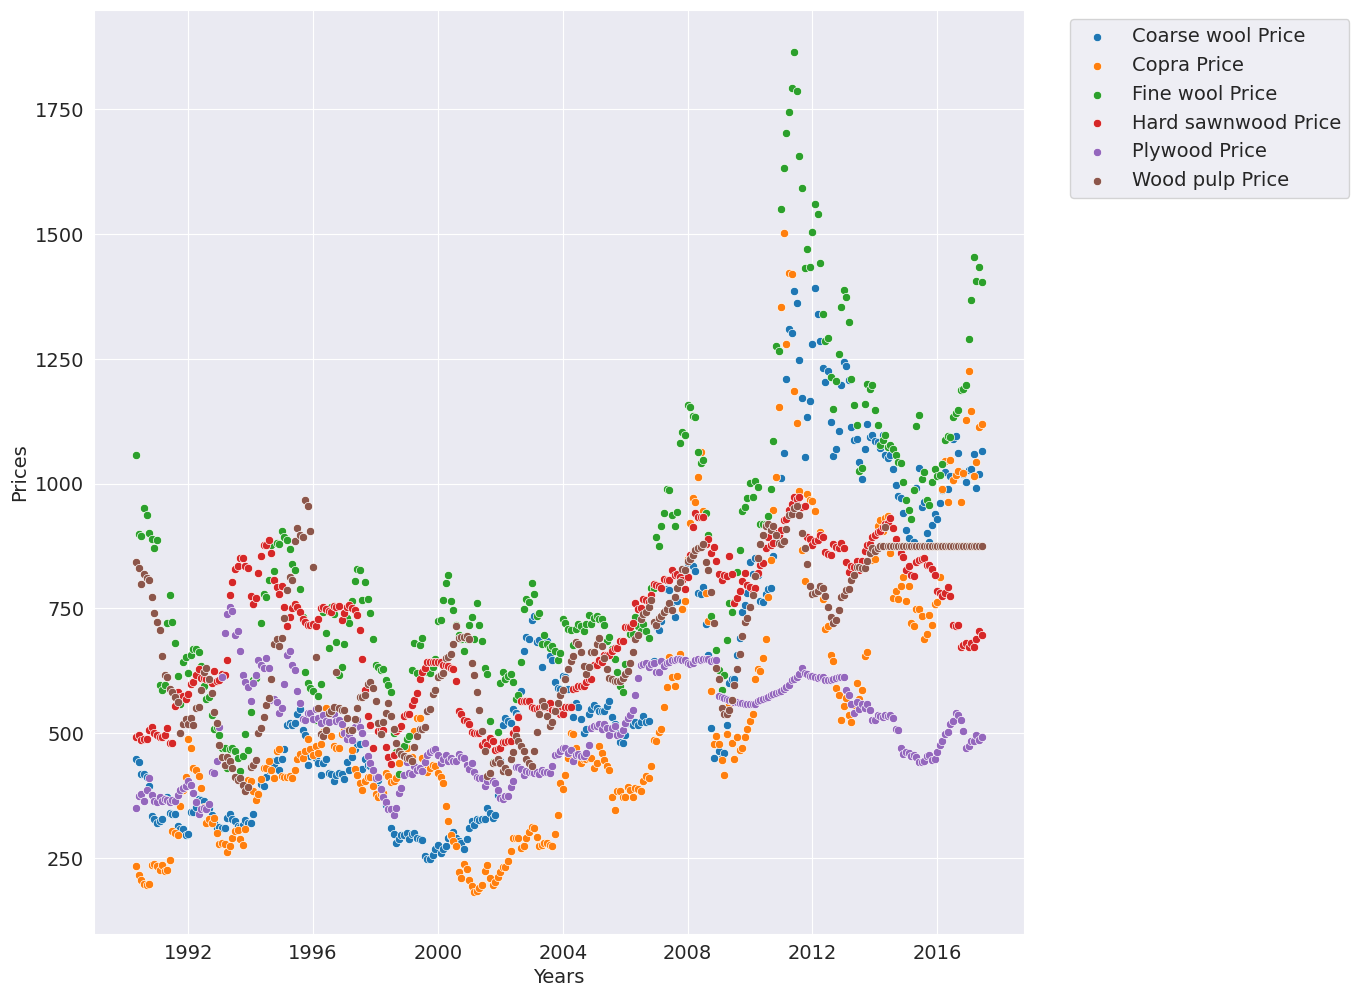

In [ ]:
#Gráfico de dispersão para a visualização das matérias-primas de alto preço
#Cria uma lista com as metérias-primas de alto preço
lista_alto_preco = ['Coarse wool Price','Copra Price','Fine wool Price','Hard sawnwood Price','Plywood Price','Wood pulp Price']
#Define o tamanho fo gráfico e os eixos
plt.figure(figsize = (12, 12))
plt.ylabel('Prices')
plt.xlabel('Years')

#loop para iterar cada elemento na lista e exibir
for i in range(len(lista_alto_preco)):
  sns.scatterplot(y = df[lista_alto_preco[i]], x = df.index);
  plt.legend(lista_alto_preco, loc = 'upper center', bbox_to_anchor = (1.2,1))


Entre as matérias-primas de alto preço a que sofreu variação drástica foi a Lã Fina (Fine Wool) entre as matérias de menor preço sofreu variação drástica Tora Dura (Hard Log).


**QUESTÃO 05 - Descobrir a faixa de preço de matérias-primas de baixo preço**

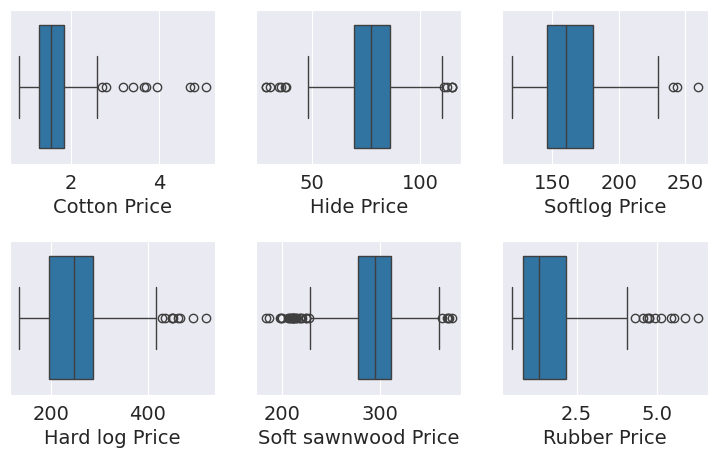

In [ ]:
#Cria subplots para a visualização da media de preços das matérias-primas de baixo preço
for i in range(6):
  plt.subplot(2, 3, i + 1)
  plt.subplots_adjust(hspace=0.5)
  sns.boxplot(x=df[lista_baixo_preco[i]])


Os círculos indicam outliers (preços atípicos), o bloco azul é onde se enconteram o maior volume de dados referente a matéria específica e a linha dentro do bloco é mediana.

- Algodão (Cotton): Mediana próximo a 2 dólares, outliers até 4 dólares.

- Couro (Hide): Mediana por volta de 75 dólares, outliers abaixo de 50 dólares.

- Madeira em toras macias (Softlog): Mediana um pouco mais que 150 dólares, 3 outliers perto de 250 dólares.

- Tora Dura (Hard log): Mediana um pouco acima de 200 dólares, outliers acima de 400 dólares.

- Madeira Serrada Macia (Soft sanwood): Mediana bem perto de 300 dólares, outliers próximos a 200 dólares.

- Borracha (Rubber): Mediana bem abaixo de 2,5 dólares, outliers acima de 4 dólares.